# Equilibrio Idrostatico per un corpo Planetario

In this notebook we compute the idrostatic equilibrium for a planetary body, using the simple analysis presented in class. 

In the simple case presented, the relevant parameters are the average density of the spherical body (assumed approximately constant) and the maximum pressure where the material internal structure breaks down (and can then behave like a fluid). 

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# This function implements the simple integral solution where we can 
#    assume constant density. 
# 
# To speed up the computation we provide a numerical value for the constants
# scaling the numbers assuming that rho will be given in g/cm3 and R in km
#
# G = 6.67259e-11 # m-3 s-2 kg-1
# k = 2./3.*np.pi*G
# I need to multiply to 1000^2 to convert rho in kg/m3 (rho comes squared)
# I need to multiply by 1000^2 to convert r in m (r comes squared too)
# hence we have a factor 1.e12 in front
# k = 2.09440*6.67259e-11*1.e12 = 139.751
k = 139.751
def p_simple(r, Rplanet, rho=5.5):
    #
    return k*rho*rho*(Rplanet*Rplanet-r*r)

In [4]:
def compute_simple_planet(Rp, rho, pcrit=1.e9, nrad=1000):
    #
    r = np.linspace(0.,Rp,nrad)
    p = p_simple(r, Rp, rho=rho)
    return (r, p)

In [14]:
Earth = compute_simple_planet(6371., 5.513)
Venus = compute_simple_planet(6052., 5.243)
Mars = compute_simple_planet(3390., 3.934)
Mercury = compute_simple_planet(2440., 5.427)
Moon = compute_simple_planet(1738., 3.344)
Ceres = compute_simple_planet(939./2., 2.16)
Pluto = compute_simple_planet(1188., 1.854)

(0.0, 7000.0)

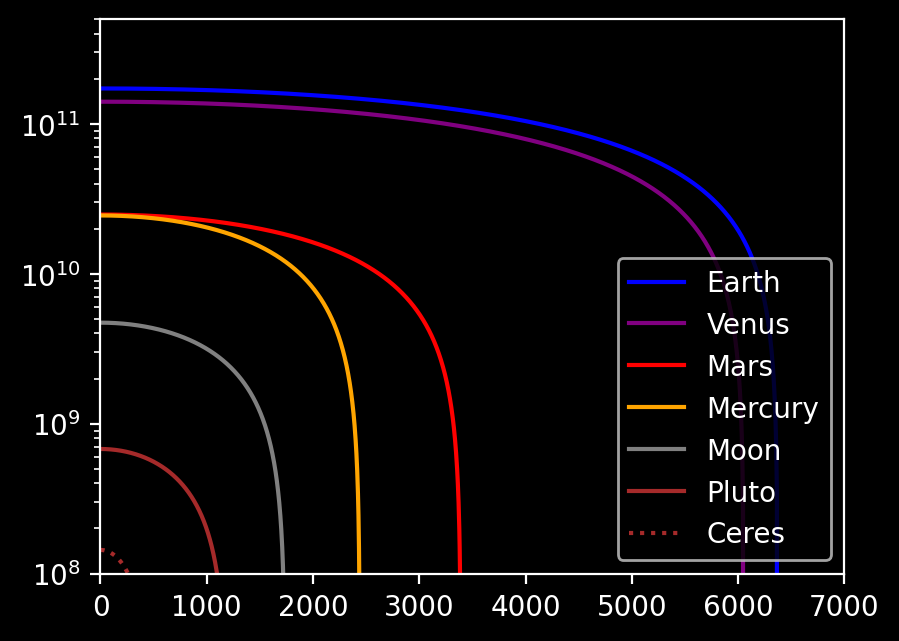

In [15]:
plt.plot(Earth[0], Earth[1], color='b', label="Earth")
plt.plot(Venus[0], Venus[1], color='purple', label="Venus")
plt.plot(Mars[0], Mars[1], color='r', label="Mars")
plt.plot(Mercury[0], Mercury[1], color='orange', label="Mercury")
plt.plot(Moon[0], Moon[1], color='gray', label="Moon")

plt.plot(Pluto[0], Pluto[1], color='brown', label="Pluto")
plt.plot(Ceres[0], Ceres[1], linestyle='dotted', color='brown', label="Ceres")

plt.legend()

plt.yscale('log')
plt.ylim(1.e8,5.e11)
plt.xlim(0,7000.)